## 1. Introduction

=================================================================================================================================================

Group 2

Batch : 030 RMT

Data Analyst   : Rizky Chester Abadi, Ranie Sita Mannuela.

Data Scientist : Raymond Samuel, Raodah Hasman.

Data Engineer  : Raymond Samuel.

* Dataset Source: https://archive.ics.uci.edu/
* Dataset name  : online_shoppers_intention.csv

#### Latar belakang: 
* Penggunaan E-Commerce telah meningkat pesat dalam beberapa tahun terakhir, menciptakan peluang besar di pasar. Namun, tingkat konversi pembelian tidak meningkat dengan kecepatan yang sama, sehingga diperlukan solusi yan dapat memberikan promosi yang dipersonalisasi kepada pembeli online. Dalam perdagangan fisik, seorang penjual dapat menawarkan berbagai alternatif yang disesusaikan kepada pembeli berdasarkan pengalaman yang telah diperolehnya. Pengalaman ini sangat mempengaruhi efisiensi waktu, tingkat konversi pembelian, dan angka penjualan.

* Banyak perusahaan E-Commerce dan teknologi informasi menginvestasikan sumber daya untuk mengembangkan sistem deteksi dini dan prediksi perilaku yang meniru perilaku penjual pada lingkungan belanja virtual. Beberapa studi akademis juga telah mengusulkan berbagai metode machine learning untuk menangani  masalah terseubt dari berbagai perspektif. Beberapa studi berfokus pada pengelompokkan kunjungan berdasarkan pola navigasi pengguna, sementara yang lain bertujuan untuk memprediksi perilaku pengguna secara in time untuk mengamil tindakan yang tepat guna meningkatkan tingkat penyelesaian transaksi dan mengurangi tingkat pengabaian keranjang belanja.


#### SMART framework
* Spesific      : Memprediksi konversi pengunjung situs E-Commerce berdasarkan perilaku browsing
* Measurable    : Mengukur tingkat akurasi mencapai 80% pada model prediksi konversi pengunjung
* Achieveable   : Mengembangkan dan mengimplementasikan model prediksi menggunakan data historis pengunjung
* Relevant      : Mendukung keputusan bisnis untuk meningkatkan konvesi dan retensi pelanggan
* Time bound    : Mencapai model prediksi dengan akurasi tinggi dalam 1 minggu

#### Identifikasi Masalah :
1. Bagaimana kategori berdasarkan jenis pengunjung dari setiap wilayah?
2. Apa kategori sistem operasional yang digunakkan oleh pengguna?
3. Bagaimana kategori berdasarkan banyaknya pengguna yang membeli dari tiap region
4. Bagaimana distribusi jumlah halaman produk yang dikunjungi pengguna?
5. Apakah ada hubungan antara durasi di halaman administratif dan bounce rates?
6. Fitur apa yang paling berpengaruh terhadap pendapatan?
7. Analisis deskriptif : Bagaimana analisi distribusi nilai halaman produk dan analisis durasi halaman administratif dengan bounce rates?



#### Objective     : 
* Analisis mengenai perilaku Visitor belanja online secara in-time yang terdiri dengan memprediksi apakah Visitor tersebut menghasilkan Revenue atau tidak

* Pada program ini, kami memprediksi niat pembelian pengguna menggunakan data tampilan halaman yang dikumpulkan selama kunjungan, bersama dengan informasi sesi dan pengguna. Dengan menggunakan data ini, kami membuat model prediksi untuk memahami apakah pengunjung memiliki niat untuk melakukan pembelian atau tidak. Pada model ini digunakan metrik precision dengan tujuan meminimalisir terjadinya True Positif (pengunjung yang sebenarnya tidak belanja, namun dikategorikan belanja). Pada model ini dilakukan enam jenis model yaitu Logstic Regression, KNN, SVM, Decision Tree, Random Forest, dan XGBoost. Model XGBoost terbukti memberikan kinerja terbaik setelah dilakukan hyperparameter tuning, dengan memiliki nilai precision skor paling tinggi dibandingkan dengan model lain.

=================================================================================================================================================

## 2. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle

## 2. Data Loading

In [2]:
# Load Dataset
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df = pd.read_csv("online_shoppers-intention.csv")
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Column from dataset:

Administrative  | Jumlah halaman administratif yang dikunjungi pengguna. Nilainya berupa integer (misalnya, 0, 1, 2, ...).

Administrative_Duration | Total durasi waktu (dalam detik) yang dihabiskan pengguna di halaman administratif. Nilainya berupa float (misalnya, 0.0, 15.5, 30.2, ...).

Informational | Jumlah halaman informatif yang dikunjungi pengguna. Nilainya berupa integer.

Informational_Duration | Total durasi waktu (dalam detik) yang dihabiskan pengguna di halaman informatif. Nilainya berupa float.

ProductRelated | Jumlah halaman yang terkait dengan produk yang dikunjungi pengguna. Nilainya berupa integer.

ProductRelated_Duration | Total durasi waktu (dalam detik) yang dihabiskan pengguna di halaman produk. Nilainya berupa float.

BounceRates | Rasio bouncing, yaitu persentase sesi di mana pengguna hanya melihat satu halaman sebelum meninggalkan situs. Nilainya berupa float (misalnya, 0.0, 0.2, 0.5, ...).

ExitRates | Rasio keluar, yaitu persentase tampilan halaman terakhir sebelum pengguna meninggalkan situs. Nilainya berupa float.

PageValues | Nilai rata-rata halaman yang dilihat pengguna selama sesi. Nilainya berupa float.

SpecialDay | Indikator apakah hari tersebut adalah hari spesial yang dapat mempengaruhi perilaku belanja pengguna (misalnya, Black Friday, Hari Natal). Nilainya berupa float yang menunjukkan kedekatan hari itu dengan hari spesial (misalnya, 0.0 untuk bukan hari spesial, 1.0 untuk hari spesial).

Month | Bulan di mana sesi tersebut terjadi. Nilainya berupa object (misalnya, "Jan", "Feb", ...).

OperatingSystems | Jenis sistem operasi yang digunakan pengguna. Nilainya berupa integer yang mungkin mengindikasikan berbagai sistem operasi (misalnya, 1 untuk Windows, 2 untuk MacOS, ...).

Browser | Jenis browser yang digunakan pengguna. Nilainya berupa integer yang mungkin mengindikasikan berbagai browser (misalnya, 1 untuk Chrome, 2 untuk Firefox, ...).

Region | Wilayah geografis dari pengguna. Nilainya berupa integer yang mungkin mengindikasikan berbagai wilayah (misalnya, 1 untuk Amerika Utara, 2 untuk Eropa, ...).

TrafficType | Jenis lalu lintas yang mengarahkan pengguna ke situs. Nilainya berupa integer yang mungkin mengindikasikan sumber lalu lintas (misalnya, 1 untuk organik, 2 untuk berbayar, ...).

VisitorType | Tipe pengunjung (misalnya, "Returning_Visitor" untuk pengunjung yang kembali, "New_Visitor" untuk pengunjung baru). Nilainya berupa object.

Weekend | Indikator apakah sesi terjadi pada akhir pekan. Nilainya berupa boolean (True atau False).

Revenue | Indikator apakah sesi menghasilkan pendapatan atau tidak (apakah pengguna melakukan pembelian). Nilainya berupa boolean (True atau False).

In [5]:
# Menampilkan Rangkuman informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

***insight***: Data consist of 12330 Row and 18 Column/Feature with 4 Categoric Feature and 14 Numeric Feature

In [9]:
# Cek data teratas
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [10]:
# Menampilkan nilai statistika deskriptif
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


***insight***: Berdasarkan hasil di atas, dapat diketahuin bahwa nilai mean dan maximum setiap fitur memiliki selisih yang cukup jauh sehingga kemungkinan data tidak terdistribusi normal

## 3. Exploratory Data Analysis (EDA)

#### Cek Data Duplikat

In [11]:
#Cek duplikat data
duplicates_df = df[df.duplicated()]
duplicates_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


Terdapat 125 data yang duplikat.

#### Cek Missing Values

In [12]:
# Cek missing values
null_values = df.isnull().sum()
null_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

***Insight***: Tidak terdapat missing Values

#### Cek distribusi Kolom Numerik dan Kategorik

In [13]:
# Membuat function untuk visualisasi histogram Kolom Numerik
def distribution_plots(df, variable):
    # definisikan figsize
    plt.figure(figsize=(16, 4))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True ,bins=30)
    plt.title('Numerical Histogram')
    
    plt.show()

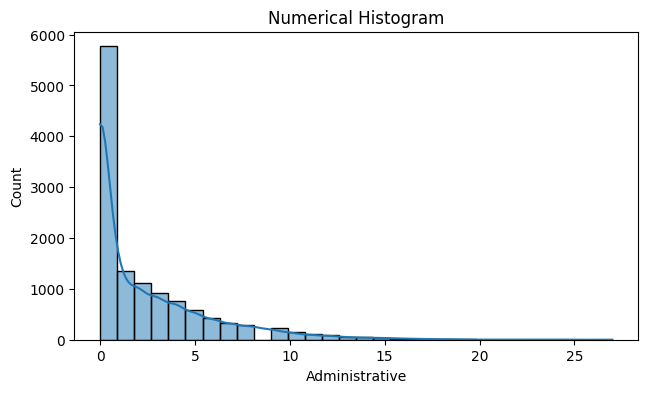

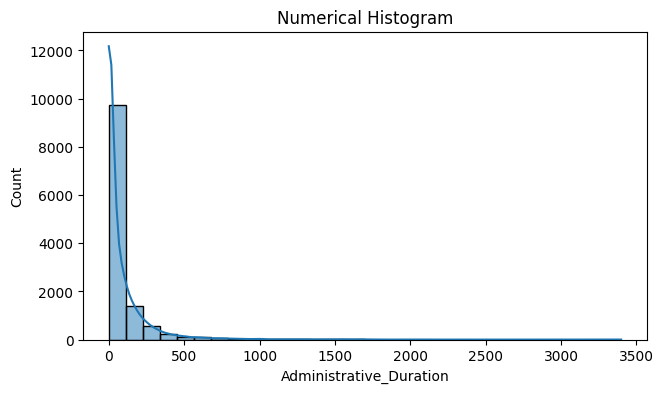

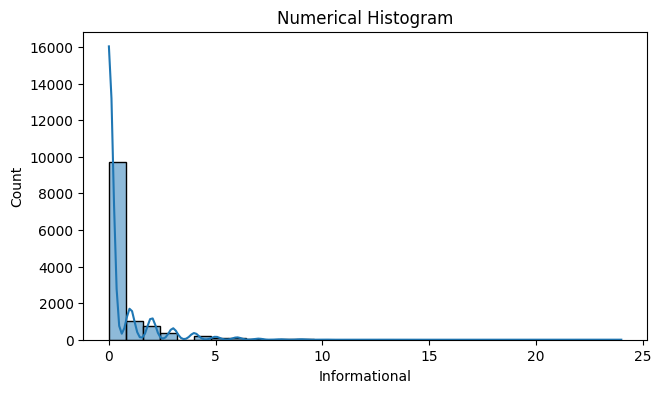

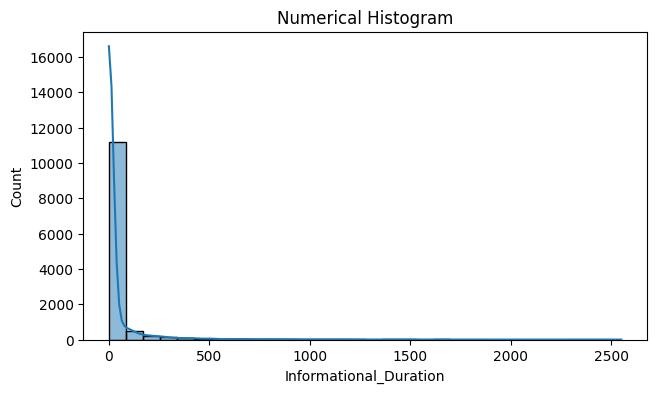

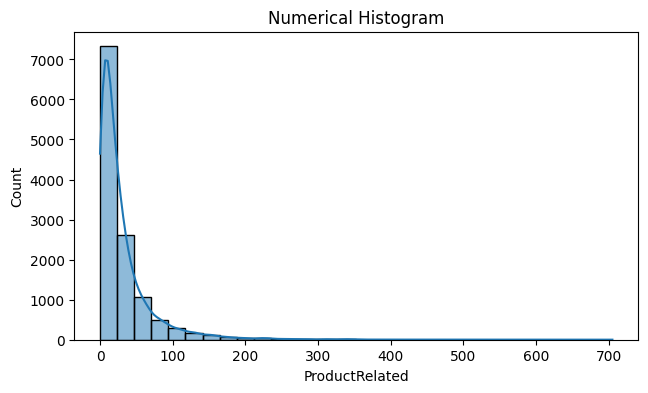

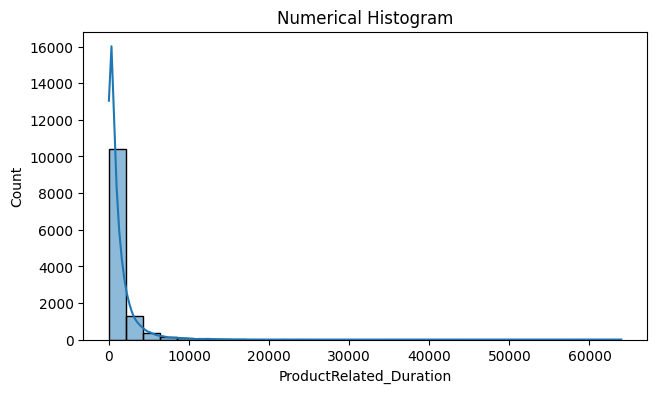

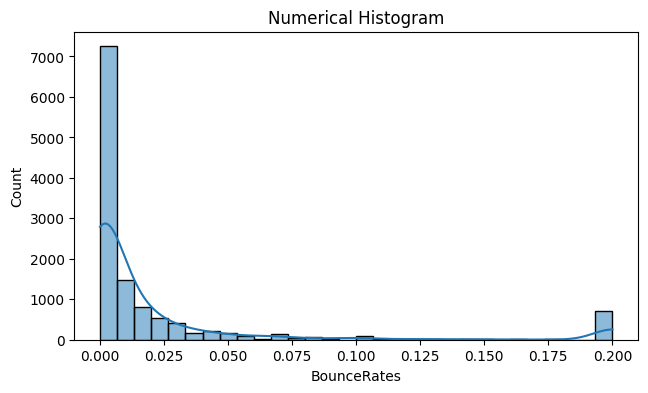

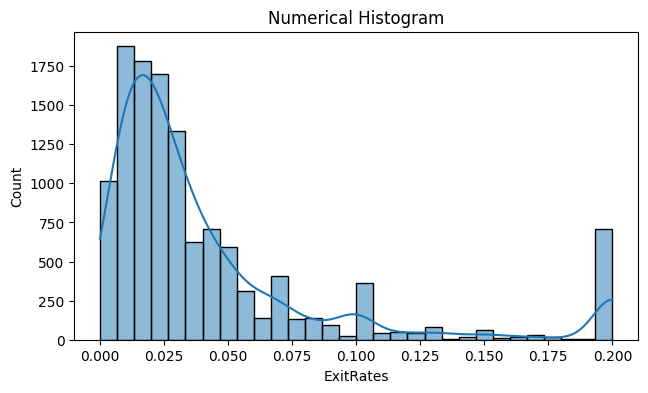

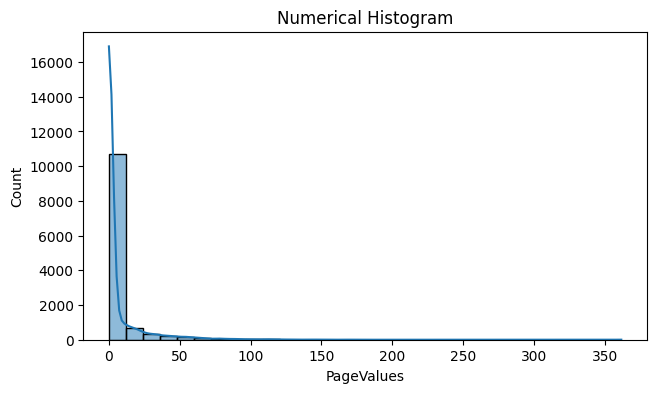

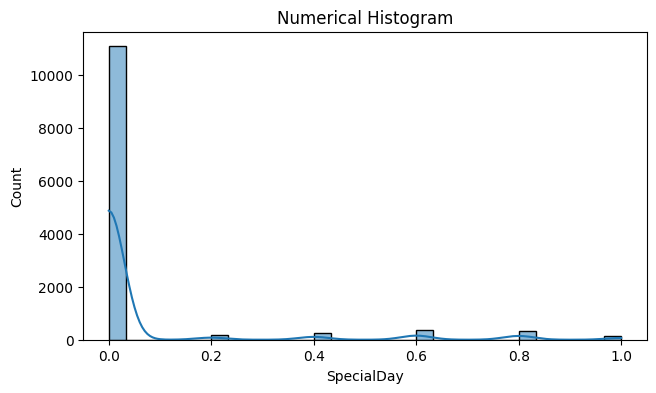

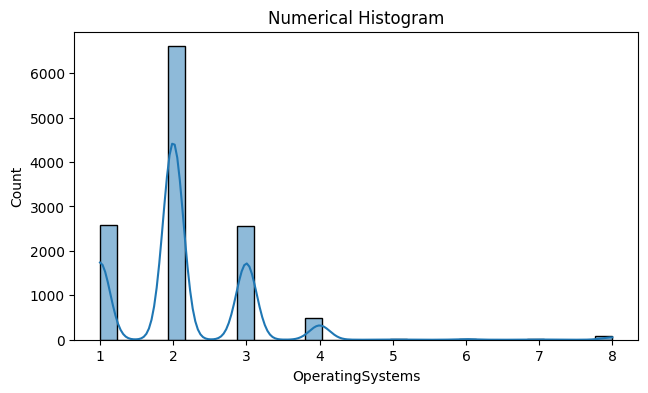

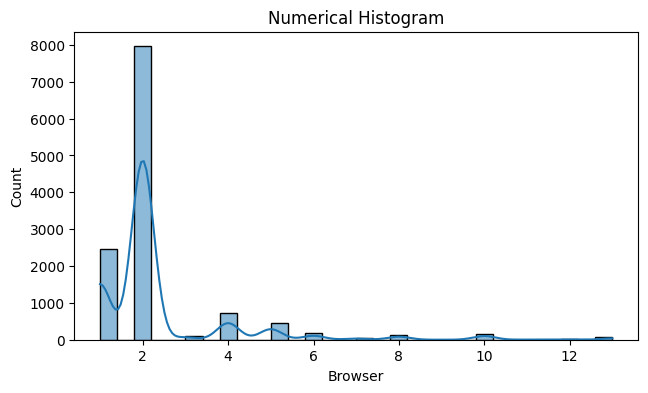

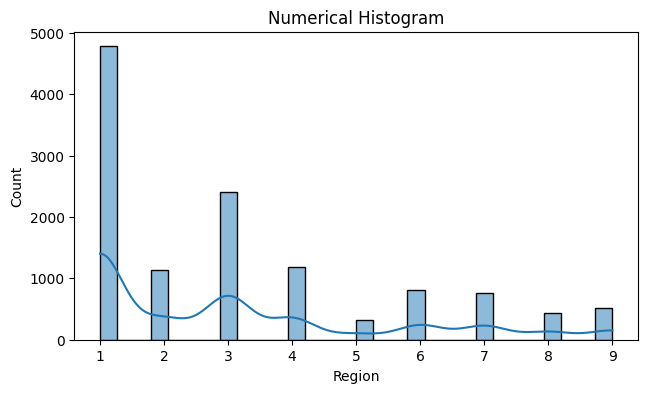

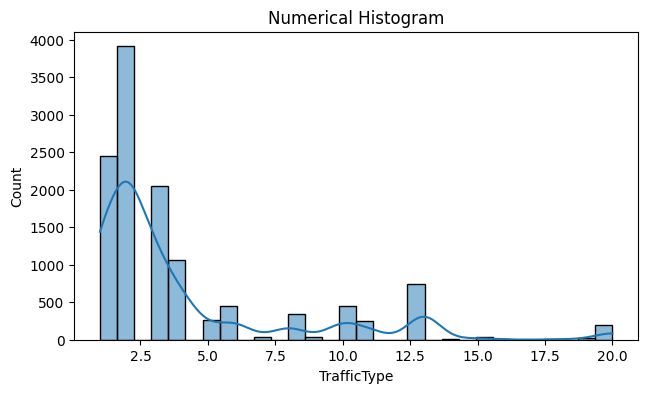

In [14]:
# Menampilkan histogram
for columns in df.select_dtypes(include=np.number).columns.tolist():
    distribution_plots(df,columns)

***insight***:
- Administrative : Kebanyakan pengunjung hanya mengunjungi sedikt halaman administratif, terlihat dari distribuusi yang sangat miring ke kanan. Beberapa pengunjung mengunjungi lebih banyak halaman administratif, namun hal ini sangat jarang terjadi.
- Administrative_duration : Waktu yang dihabiskan pada halaman administratif juga menunjukkan distribusi yang miring ke kanan. Kebanyakan pengunjung hanya menghabiskan sedikit waktu di halaman ini.
- Informational : Seperti pada halaman administratif, halaman informasi juga jarang dikunjungi oleh pengunjung. Distribusi miring ke kanan, menunjukkan sebagian besar pengunjung mengungjungi sedikit atau tidak ada halaman informasi.
- Informational_duration : Waktu yang dihabiskan pada halaman informasi hanya sedikit, mayoritas pengunjung menghabiskan waktu yang sangat singkat.
- ProductRelated : Halaman yang berkaitan dengan produk lebih sering dikunjungi dibandingkan dengan halaman administratif dan informasional. Meskipun begitu, distribusi tetap miring ke kanan, menunjukkan  beberapa pengunjung yang mengunjungi banyak  halaman produk.
- ProductRelated_Duration : Waktu yang dihabiskan pada halaman produk lebih bervariasi, namun mayoritas pengunjung tetap menghabiskan waktu yang cukup singkat pada halaman ini.
- BounceRates : Sebagian besar pengunjung memiliki tingkat bounce rate yang rendah, namun terdapat beberapa outliers yang memiliki bounce rate tinggi.
- ExitRates : Distribusi exit rates menunjukkan bawha sebagian besar pengunjung meninggalkan situs setelah mengunjungi beberapa halaman. Terdapat outliers yang menunjukkan beberapa pengunjung memiliki exit rates yang tinggi.
- PageValues : Sebagian besar nilai halaman rendah, namun ada beberapa halaman dengan nilai yang sangat tinggi, menunjukkan kontribusi besar terhadap revenue
- SpecialDay : Mayoritas pengunjung datang pada hari-hari biasa, dengan sedikit yang menungjungi pada hari-hari spesial.
- OperatingSystems : Histogram menunjukkan bahwa mayoritas pengunjung menggunakan sistem operasi dengan label 2 dan 3. Terdapat sejumlah besar pengunjung yang menggunakan sistem operasi dengan label 1. Sangat sedikit pengunjung yang menggunakan sistem operasi di luar label 1,2 dan 3.
- Browser : Mayoritas pengunujung menggunakan browser dengan label 2. Browseer dengan label 1 juga cukup sering digunakan. Penggunaan browser lainnya sangat jarang.
- Region : Sebagian besar pengunjung berasal dari wilayah dengan label 1. Wilayah dengan label 3 dan 4 juga memiliki jumlah pengunjung yang cukup signifikan. Wilayah lainnya memiliki jumlah pengunujung yang relatif lebih sedikit. 
- TrafficType : Kebanyakan pengunjung datang dari traffic type dengan label 2 dan 1. Ada beberapa traffic type lainnya dengan label 3,4,dan 5 yang juga memberikan kontribusi pengunjung yang signifikan. Traffic type dengan label di atas 5 sangat jarang.

In [15]:
# membuat function untuk visualisasi histogram kolom kategorik

def distribution_plots(df, cat_col):
    for variable in cat_col:
        # definisikan figsize
        plt.figure(figsize=(16, 8))
        
        # Histogram
        plt.subplot(2, 1, 1)
        sns.histplot(df[variable], kde=True, bins=30)
        plt.title(f'Histogram of {variable}')
        
        # Box Plot
        plt.subplot(2, 1, 2)
        sns.boxplot(x=df[variable])
        plt.title(f'Box Plot of {variable}')
        
        plt.show()

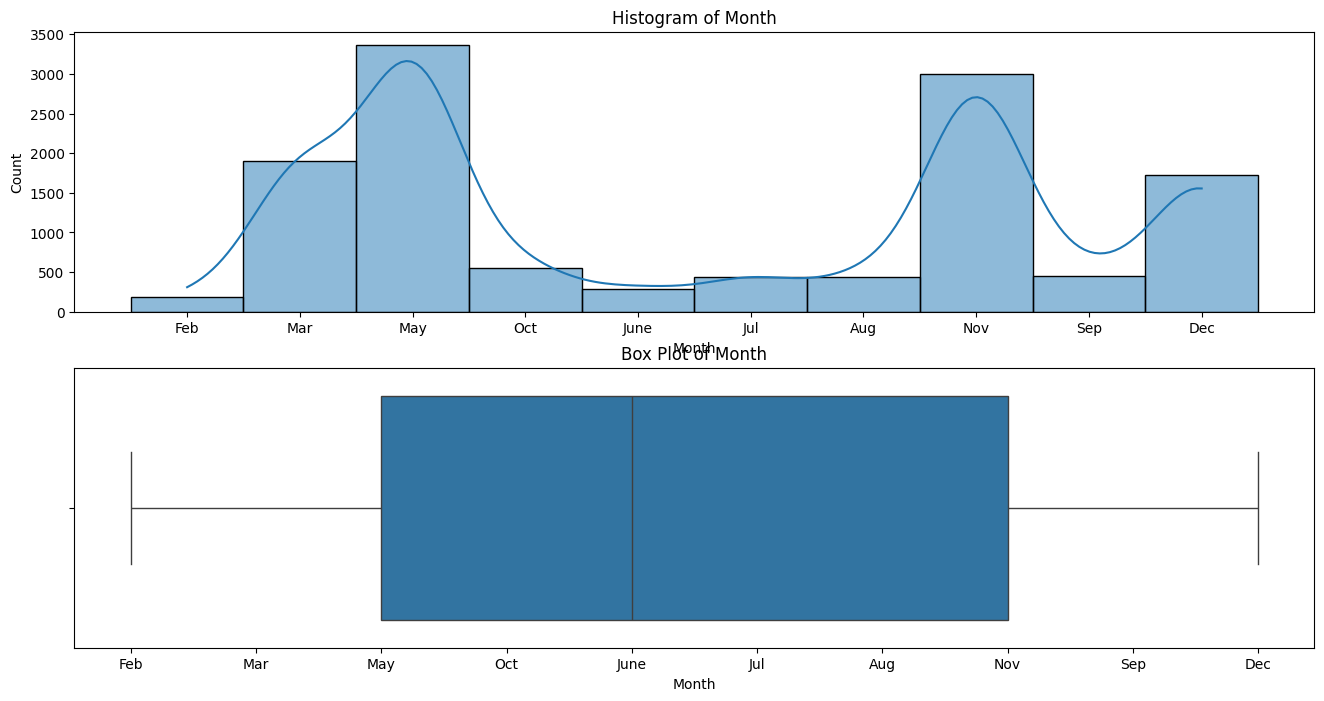

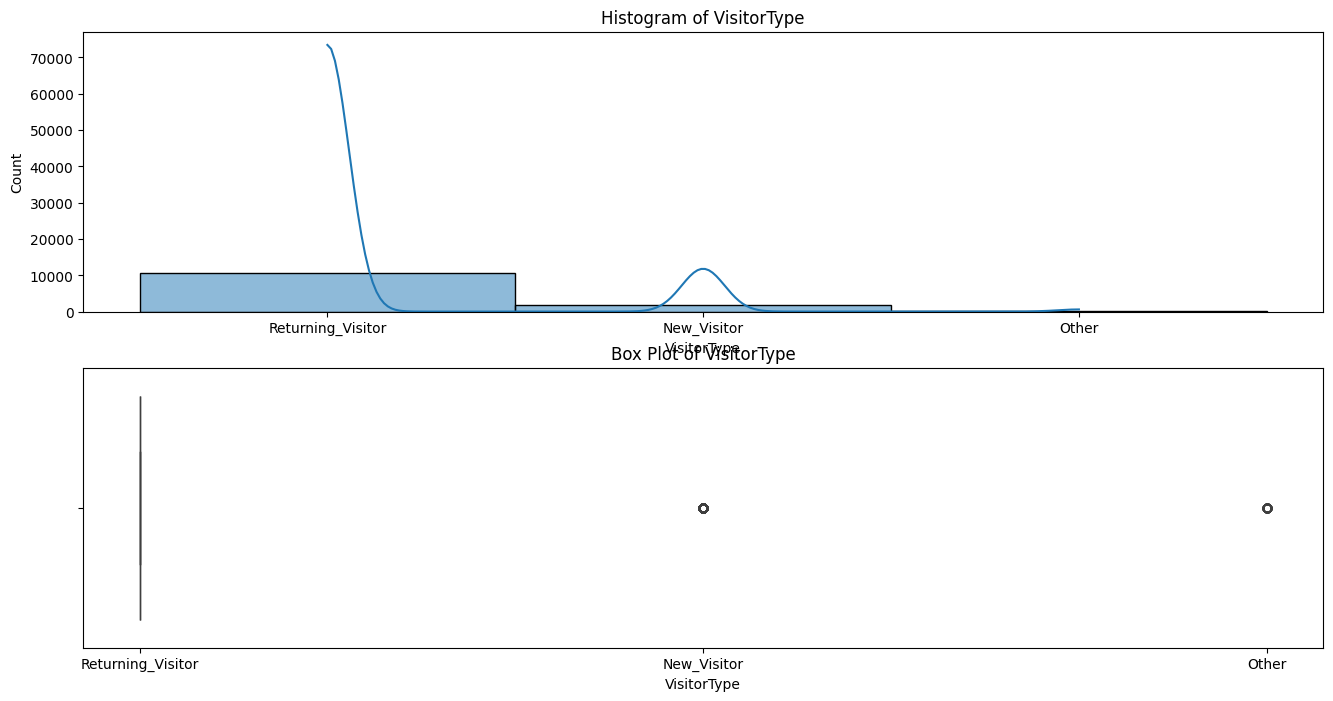

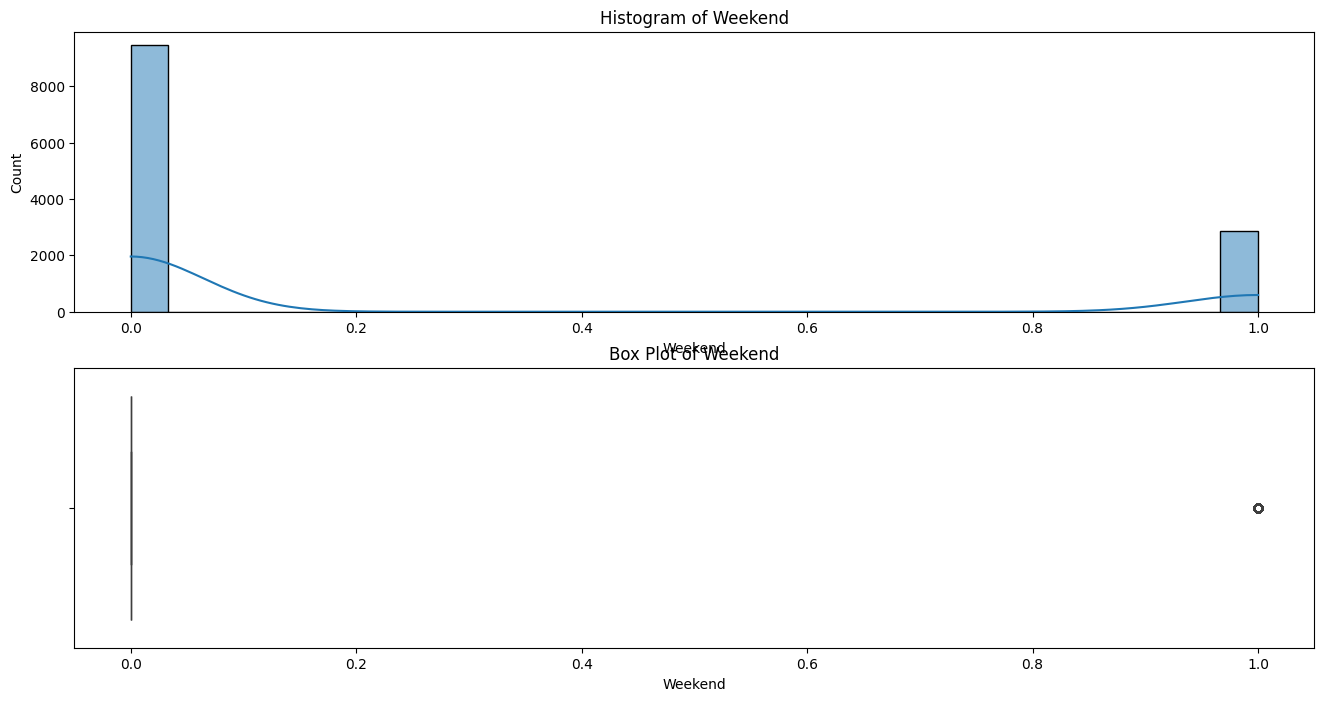

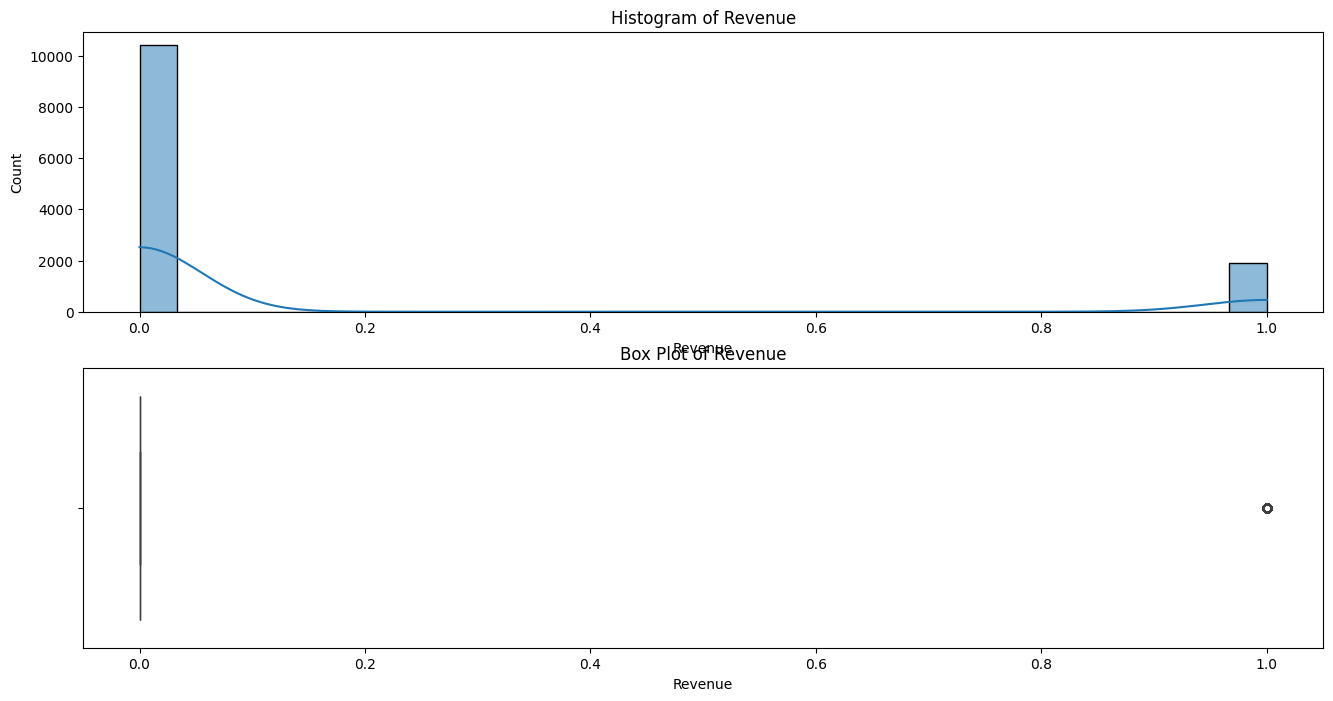

In [16]:
# tampilkan histogram
distribution_plots(df, df.select_dtypes(include=['object', 'bool']).columns.tolist())

***insight***:
Kesimpulan
- Month 
    - Histogram : menunjukkan bahwa pengunjung terbanyak datang pada bulan Mei dan November. Ada penurunan signifikan pada bulan-bulan musim panas seperti Juni dan Juli, dan kenaikan kembali di akhir tahun.
    - Box Plot : mengonfirmasi bahwa data distribusi bulan relatif merata sepanjang tahun, dengan pengecualian beberapa bulan yang memiliki pengunjung lebih sedikit.
- VisitorType
    - Histogram : mayoritas pengunjung adalah pengunjung yang kembali (Returning Visitor). Terdapat sejumlah kecil pengunjung baru (New Visitor) dan sangat sedikit dari kategori lainnya (Other).
    - Box Plot : menunjukkan bahwa hampir semua data berada di kategori Returning Visitor, dengan beberapa outlier di kategori New Visitor dan Other.
- Weekend
    - Histogram : menunjukkan bahwa lebih banyak pengunjung mengunjungi situr pada hari kerja daripada akhir pekan.
    - Box Plot : mengonfirmasi bahwa sebagian esar pengunjung mengunjungi situs pada hari kerja dengan beberapa outlier di akhir pekan.
- Revenue
    - Histogram : sebagian besar kunjungan tidak menghasilkan pendapatan (Revenue=0). Terdapat sedikit kunjungan yang menghasilkan pendapatan (Revenue=1).
    - Box Plot : menunjukkan distribusi yang miring, dimana sebagian besar data tidak menghasilkan pendapatan dengan beberapa outlier yang menghasilkan pendapatan.

- Insight dari visualisasi ini menunjukkan pola pengunjung dan waktu kunjungan yang dapat membantu dalam merancang strategi pemasaran dan promosi, misalnya :
    - Meningkatkan promosi dan penawaran apda bulan-bulan dengan pengunjung lebih sedikit.
    - Fokus pada retensi pengunjung yang sudah ada, karena mayoritas adalah pengunjung yang kembali.
    - Menarik lelbih banyak pengunujung di akhir pekan dengan penawaran khusus.
    - Menganalisis lebih lanjut faktor-faktor yang mendorong pendapatan untuk meningkatkan konversi kunjungan menjadi pendapatan.

#### Category by Visitor Type from each Region

<Axes: ylabel='VisitorType'>

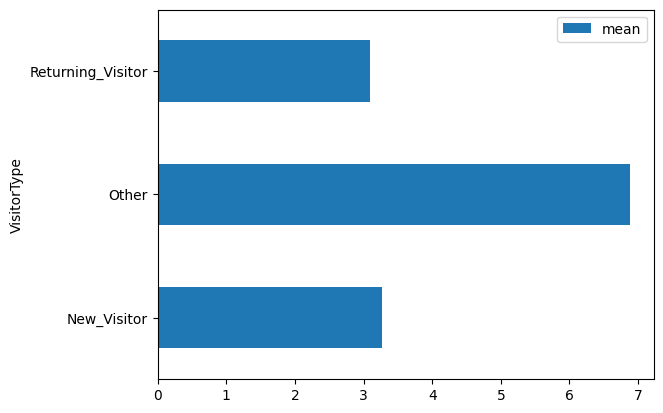

In [17]:
# Grouping and aggregating 'VisitorType' berdasarkan Region
df.groupby(by=['VisitorType']).Region.agg(["mean"]).plot(kind='barh')

***insight***:
- Rata-rata Pengunjung yang datang kembali(Returning_Visitor) berasal dari region 3, dan yang tergolong pengunjung (Other) rata-rata berasal dari region 7, sedangkan pengunjung baru(New_Visitor) berasal dari region 3 dan 4

***Bussines Recommendation***:
- Target New Visitors: Meningkatkan pemasaran di wilayah dengan potensi pengunjung baru yang lebih tinggi untuk menarik lebih banyak pengunjung baru.
- Optimize for Other Visitor Categories: Identifikasi apa yang menarik kategori pengunjung "Others" dan terapkan strategi tersebut di wilayah lain.
- Increase Returning Visitor Loyalty: Buat program loyalitas atau penawaran khusus untuk mempertahankan dan meningkatkan keterlibatan pengunjung kembali.

### Kategori Sistem Operasional yang digunakan oleh Visitor

<Axes: ylabel='VisitorType'>

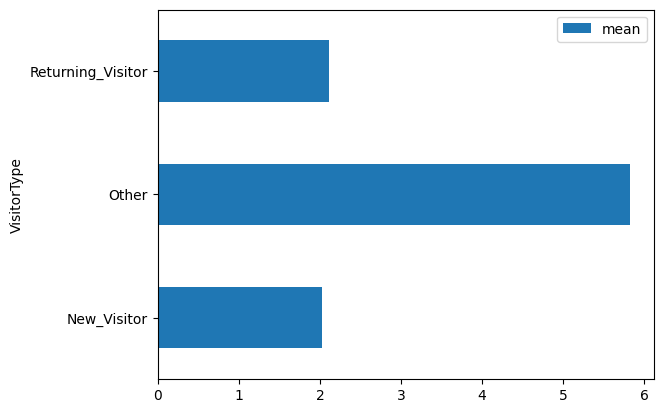

In [8]:
# Grouping and aggregating 'VisitorType' berdasarkan Region
df.groupby(by=['VisitorType']).OperatingSystems.agg(["mean"]).plot(kind='barh')

***insight***: 
- Rata-rata Visitor yang tergolong dalam 'Other' menggunakan tipe operating system 6, dan untuk 'Returning Visitor' dan 'New_Visitor' rata-rata menggunakan operating system tipe 2.

***Bussines Recommendation***:
- Optimize Technology: Pastikan website atau aplikasi kompatibel dengan berbagai sistem operasi, terutama yang digunakan kategori “Other”.
- Develop Applications: Pertimbangkan untuk mengembangkan fitur yang mendukung berbagai sistem operasi.
- Targeted Marketing Campaigns: Gunakan data sistem operasi untuk menargetkan kampanye pemasaran yang lebih spesifik.

### Kategori  Berdasarkan banyaknya Visitor yang membeli dari tiap Region

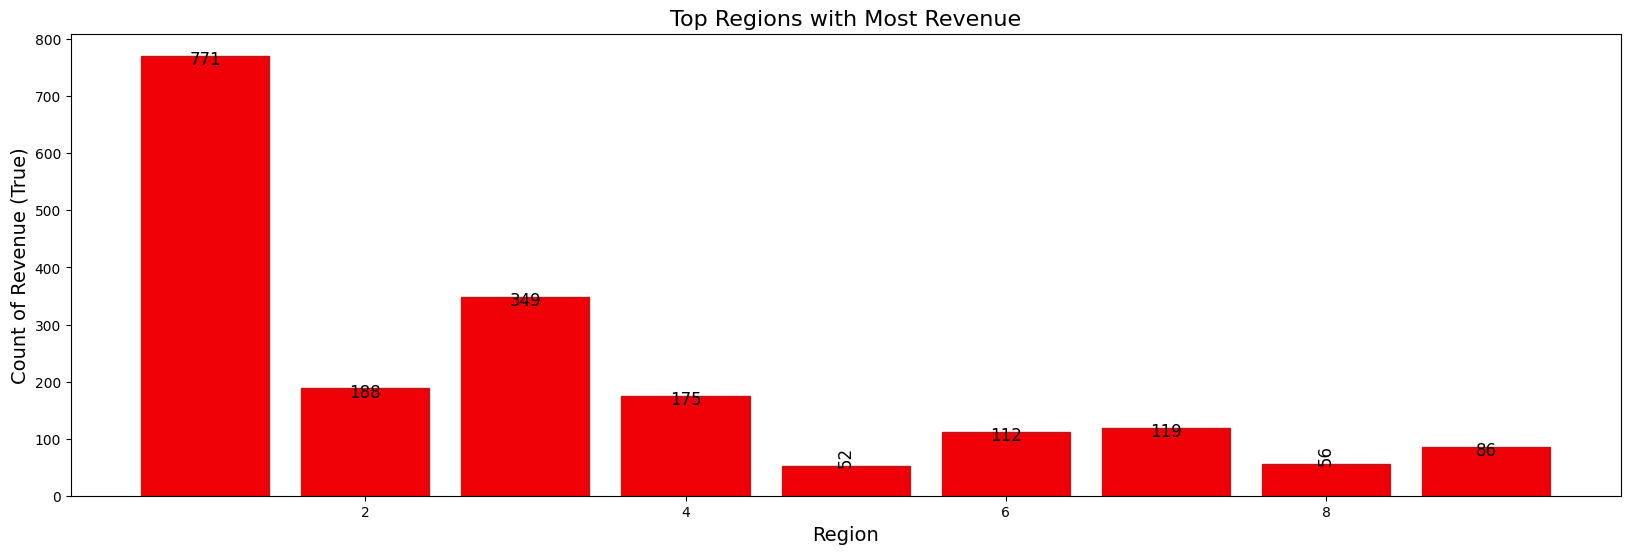

In [19]:
# Grouping Region yang pengunjungnya akan membeli(True)
top_Region = df[df['Revenue'] == True].groupby('Region').size().reset_index(name='Count')

# Sorting
top_Region = top_Region.sort_values('Count', ascending=False).head(20)

# Plot the top Region with the most Revenue
plt.figure(figsize=[20, 6])
plt.bar(top_Region['Region'], top_Region['Count'], color='#EF0107', edgecolor='#B31B1B')

# Define Title and label
plt.title("Top Regions with Most Revenue", fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count of Revenue (True)', fontsize=14)

# Define Text
for i, v in enumerate(top_Region['Count']):
    if v > 60:
        plt.text(top_Region['Region'].iloc[i], v-15, str(v), color='black', fontsize=12, horizontalalignment='center')
    else:
        plt.text(top_Region['Region'].iloc[i], v+4, str(v), color='black', fontsize=12, rotation=90, horizontalalignment='center')

# Showing Plot
plt.show()

***insight***:
- Wilayah dengan pendapatan tertinggi : Wilayah 1 memiliki pendapatan tertinggi dengan jumlah 771 transaksi yang menghasilkan revenue. Hal ini menunjukkan bahwa wilayah 1 merupakan pasar yang paling potensial dan menguntungkan.
- Wilayah dengan pendapatan rendah : Wilayah 5,6,7,8, dan 9 memiliki julmah transaksi yang relatif rendah. Hal ini menunjukkan bahwa wilayah tersebut memerlukan strategi pemasaran yang lebih baik untuk dapat meningkatkan pendapatan.
- Fokus pengembangan : Berdasarkan data, perusahaan dapat mempertimbangkan untuk memfokuskan upaya pemasaran dan pengembangan produk di wilayah 1 untuk dappat memaksimalkan keuntungan. Selain itu, strategi untuk meningkatkan keterlibatan dan konversi di wilayah 2 dan 3 juga bisa menjadi prioritas.
- Evaluasi wilayah rendah : Untuk wilayah 5,6,7,8, dan 9 memiliki revenue yang rendah, diperlukan evaluasi lebih lanjut untuk dapat memahami penyebab rendahnya transaksi. Hal ini bisa melibatkan analisis preferensi konsumen, perilaku belanja, dan hambatan lainnya.
- Secara keseluruhan, visualisasi ini membantu mengidentifikasi wilayah-wilayah dengan performa tinggi dan rendah, serta menyediakan dasar untuk strategi pemasaran dan penjualan yang lebih terarah serta efektif.

***Bussines Recommendation***:
- Focus on Region 1: Meningkatkan promosi dan program loyalitas di Wilayah 1 untuk memaksimalkan keuntungan.
- Strategies for Low Revenue Regions: Mengevaluasi dan mengembangkan strategi pemasaran yang lebih efektif di Wilayah 5, 6, 7, 8, dan 9.
- Explore Markets in Regions 3 and 4: Tingkatkan konversi dan loyalitas di Wilayah 3 dan 4 untuk mendorong pertumbuhan lebih lanjut.

### Distribusi ProductRelated

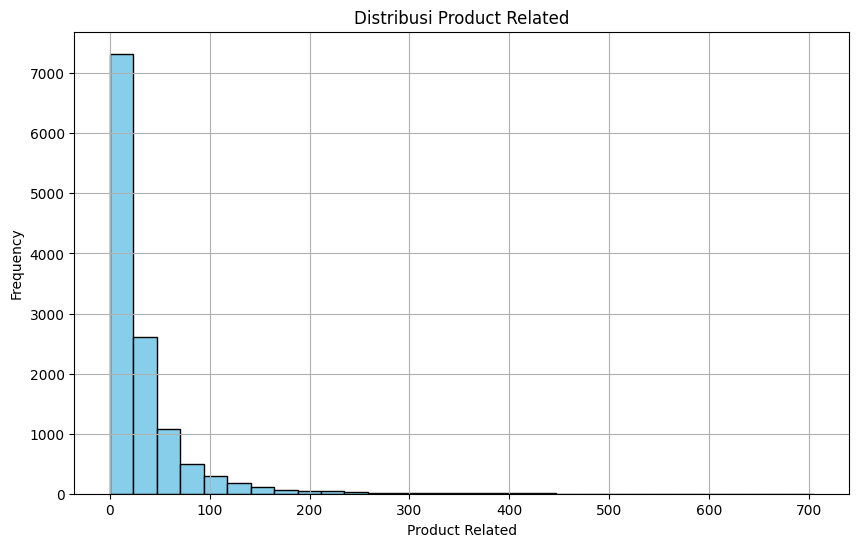

In [3]:
# Histogram untuk distribusi ProductRelated
plt.figure(figsize=(10,6))
plt.hist(df['ProductRelated'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Product Related')
plt.xlabel('Product Related')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
# Analisis Deskriptif
product_related_desc = df['ProductRelated'].describe()
print(product_related_desc)

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64


***insight***:
- Analisis deskriptif  : Rata-rata jumlah halaman yang berhubungan dengan produk yang dilihat pengunjung adalah sekitar 31.73 halaman. Hal ini memberikan gambaran mengenai tingkat aktivitas pengguna dalam menelusuri produk.
- Distribusi yang Positively Skewed : Histogram menunjukkan bahwa sebagian besar pengguna mengunjungi sedikit halaman yang berkaitan dengan produk. Distribusi ini miring ke kanan, yang berarti terdapat beberapa pengguna yang mengunjungi banyakk halaman produk.
- Mayoritas pengguna : Mayoritas pengguna mengunjuni antara 0 sampai 20 halaman produk. hal ini menunjukkkan bahwa sebagian besar sesi pengguna tidak melibatkan browsing yang mendalam di halaman produk.
- Kesimpulan : Sebagian besar pengunjung hanya meleihat sedikit halaman produk. Hal ini bisa menunjukkkan bahwa pengguna cepat menemukan apa yang mereka cari atau mungkin mereka meninggalkan situs setelah beberapa kali klik.

***Bussines Recommendation***:
- Improve Product Discovery: Terapkan fitur seperti rekomendasi yang dipersonalisasi dan navigasi yang mudah untuk mendorong pengguna explore lebih banyak halaman terkait produk.
- Targeted Content: Buat konten menarik seputar produk untuk mempertahankan perhatian pengguna dan berpotensi meningkatkan jumlah halaman yang dilihat.

### Hubungan Administrative Duration dengan Bounce Rates

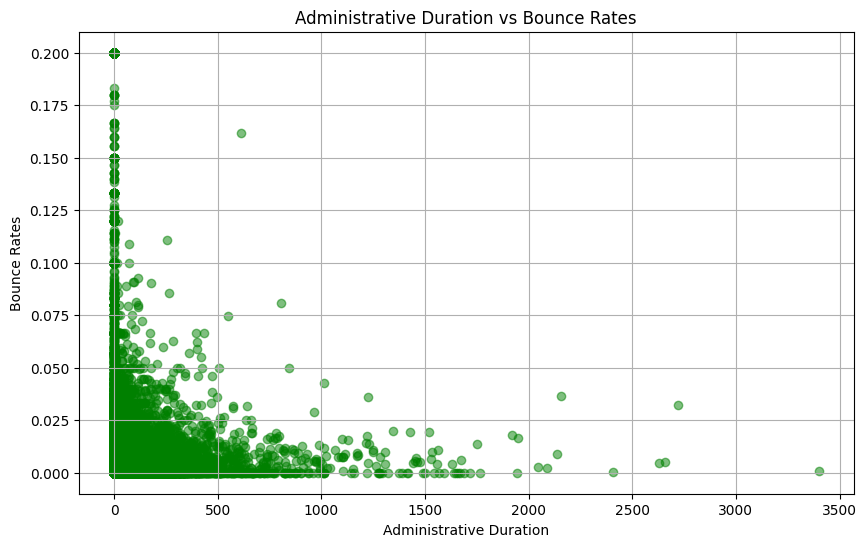

In [5]:
# Scatter plot untuk Administrative Duration vs Bounce Rates
plt.figure(figsize=(10,6))
plt.scatter(df['Administrative_Duration'], df['BounceRates'], alpha=0.5, color='green')
plt.title('Administrative Duration vs Bounce Rates')
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.grid(True)
plt.show()

In [6]:
# Analisis Deskriptif untuk Administrative Duration
admin_duration_desc = df['Administrative_Duration'].describe()
print("Deskripsi untuk Administrative Duration")
print(admin_duration_desc)
print()

# Analisis Deskriptif untuk Bounce Rates
bounce_rates_desc = df['BounceRates'].describe()
print("Deskripsi untuk Bounce Rates")
print(bounce_rates_desc)
print()

Deskripsi untuk Administrative Duration
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

Deskripsi untuk Bounce Rates
count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64



***insight***:
- Analisis deskriptif Administrative Duration : Rata-rata durasi administratif yang dihabiskan oleh pengunjung adalah sekitar 80.82 detik. Hal ini menunjukkkan bahwa secara umum, pengunjung menghabiskan waktu yang cukup signifikan sebelum melanjutkan ke halaman lain.
- Analisis deskriptif Bounce Rates : Rata-rata bounce rate adalah sekitar 0.02 atau 2%. Hal ini menunjukkan bahwa sekitar 2% dari pengunjung meninggalkan situs web setelah hanya melihat satu halaman saja.
- Korelasi negatif yang lemah : Secara umum, tidak ada korelasi yang kuat anatra durasi halaman administratif dan bounce rates. Namun, terdapat indikasi korelasi negatif yang lemah disaat durasi di halaman administratif meningkat, bounce rates cenderung sedikit menurun.
- Bounce rates rendah dengan durasi panjang : Pengguna yang menghabiskan waktu lebih lama di halaman administratif cenderung memiliki bounce rates yang lebih rendah. Hal ini mungkin menunjukkan bahwa pengguna yang benar-benar terlibat dengan konten administratif cenderung lebih tertarik dan tidak langsung meninggalkan situs.
- Variabilitas tinggi : Terdapat banyak variabilitas dalam data ini, menunjukkan bahwa faktor lain mungkin mempengaruhi bounce rates selain hanya durasi di halaman administratif.
- Kesimpulan : Meskipun terdapat sedikit kecenderungan bounce rates menurun dengan meningkatnya durasi di halaman administratif, hal ini bukan faktor dominan. Inteeraksi pengguna dengan halaman administratif tidak secara siginifikan mempengaruhi apakah mereka akan meninggalkan situs segera.

***Bussines Recommendation***:
- Enhance Administrative Content: Tingkatkan kualitas dan relevansi konten administratif untuk menjaga keterlibatan pengguna dan mengurangi bounce rates.
- User Experience Optimization: Sederhanakan navigasi dan pastikan informasi mudah diakses untuk mengurangi kemungkinan pengguna meninggalkan situs sebelum waktunya.

## 4. Feature Engineering

In [5]:
# Mengubah value fitur "Month" menjadi angka
month_mapping = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month'] = df['Month'].map(month_mapping)

In [6]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False


#### Menghapus data duplikat

In [7]:
#Menghapus data duplikat
df = df.drop_duplicates()

# Cek kembali data duplikat
df.duplicated().sum()

0

Data duplikat telah dihapus.

#### Cek Cardinality

In [15]:
# Cek Cardinality
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include=['object', 'bool']).columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,VisitorType,3,"[Returning_Visitor, New_Visitor, Other]"
1,Weekend,2,"[False, True]"
2,Revenue,2,"[False, True]"


Pada fitur-fitur kategorik akan dilakukan encoding dengan menggunakan beberapa teknik. 

#### Cek Korelasi

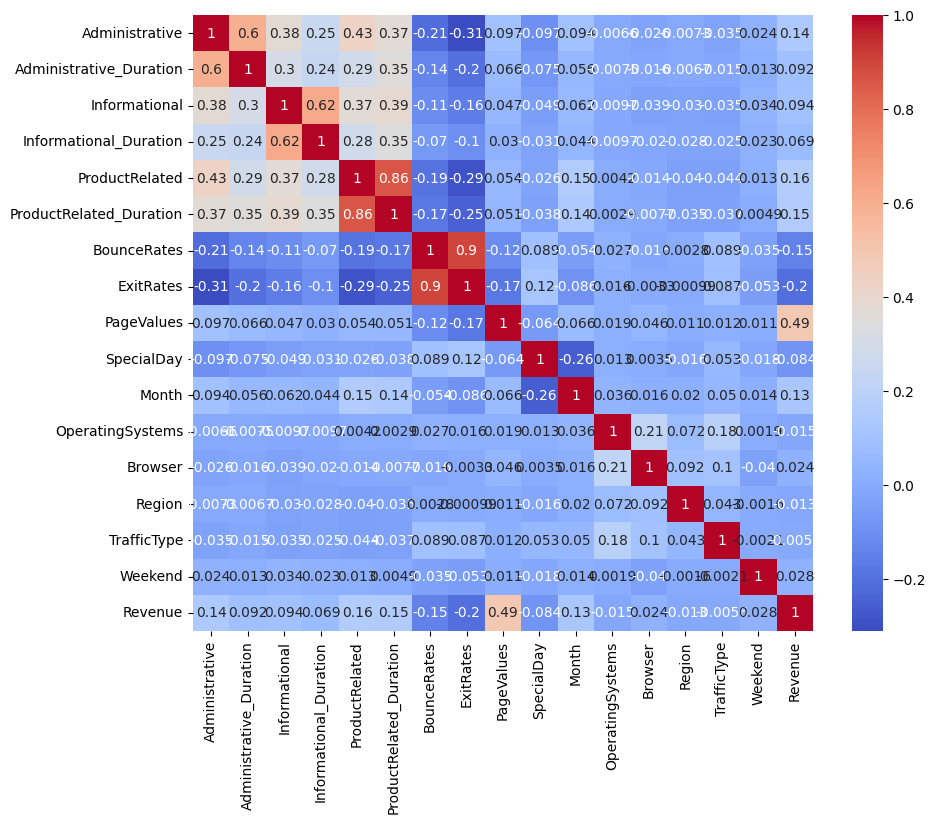

Revenue                    1.000000
PageValues                 0.491894
ProductRelated             0.156042
ProductRelated_Duration    0.150077
Administrative             0.136330
Month                      0.126412
Informational              0.093626
Administrative_Duration    0.091768
Informational_Duration     0.069358
Weekend                    0.027729
Browser                    0.024052
TrafficType               -0.005618
Region                    -0.012725
OperatingSystems          -0.014927
SpecialDay                -0.083601
BounceRates               -0.145091
ExitRates                 -0.204320
Name: Revenue, dtype: float64


In [17]:
df1 = df.drop(['VisitorType'], axis = 1)

# Menghitung korelasi antar kolom
corr = df1.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Ukuran gambar
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

correlation_with_target = df1.corr()['Revenue']
print(correlation_with_target.sort_values(ascending=False))

***Insight*** : Terdapat beberapa fitur yang memiliki korelasi yang cukup tinggi yaitu fitur 'Administrative','Informational' dan 'BounceRates' memiliki korelasi yang kuat terhadap fitur 'Administrative_Duration', 'Informational_Duration' dan 'ExitRates'.

#### Splitting between X (fitur) dan Y (label)

In [34]:
X = df.drop(['Administrative','Informational','BounceRates','Revenue'], axis = 1)
y = df['Revenue']
X

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,1,0.000000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,2,64.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,1,0.000000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,2,2.666667,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,10,627.500000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,53,1783.791667,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True
12326,0.0,0.0,5,465.750000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True
12327,0.0,0.0,6,184.250000,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True
12328,75.0,0.0,15,346.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False


#### Split between Train_set dan Test_set

In [35]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (9764, 14)
Test Size:  (2441, 14)


Insight:
- Data Training terdiri dari 9764 rows dan 17 columns
- Data testing terdiri dari 2441 rows dan 17 columns

#### Handling Outliers

In [36]:
#Cek nilai skewness

Data = list(df.select_dtypes(exclude=['object', 'bool']).columns)

listItem= []

for col in Data:
  listItem.append([col, df[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)

,nama kolom,nilai skewness
0,Administrative,1.947123
1,Administrative_Duration,5.592152
2,Informational,4.014173
3,Informational_Duration,7.540291
4,ProductRelated,4.333419
5,ProductRelated_Duration,7.253161
6,BounceRates,3.162425
7,ExitRates,2.234645
8,PageValues,6.350983
9,SpecialDay,3.285902


***Insight***: 
(Nilai Skewness yang normal berapa pada range -0.5 sampai 0.5)
- Semua fitur tidak terdistribusi normal, sehingga selanjutnya akan dilakukan handling outlier dengan menggunakan winsorizer

In [37]:
# melakukan caping terhadap data yang tidak terdistribusi normal
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables= [#'Administrative', 
                                        'Administrative_Duration', 
                                        'ProductRelated', 'ProductRelated_Duration', 
                                        #'BounceRates', 
                                        'ExitRates', 
                                        'OperatingSystems', 'Region', 'TrafficType'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [38]:
#Caping ke dua dengan menggunakan metode quantiles untuk fitur yang memiliki variasi yang rendah.
winsoriser2 = Winsorizer(capping_method='quantiles', 
                        tail='both', 
                        fold=3,
                        variables=[
                                    #'Informational', 
                                    'Informational_Duration', 
                                    'PageValues', 'SpecialDay', 'Browser'])

# Melakukan transformasi pada data
X_train_cap = winsoriser2.fit_transform(X_train_capped)
X_test_cap = winsoriser2.transform(X_test_capped)

#### Split kolom kategorik dan numerik

In [39]:
#melihat kolom numerik dan kategoris

num_columns = X_train_cap.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train_cap.select_dtypes(include = ['object', 'bool']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical Columns:  ['VisitorType', 'Weekend']


In [40]:
# Split kolom numerik dan kategoris

X_train_num = X_train_cap[num_columns]
X_train_cat = X_train_cap[cat_columns]

X_test_num = X_test_cap[num_columns]
X_test_cat = X_test_cap[cat_columns]

X_train_num

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
5667,35.700000,95.65,95,2383.139223,0.036723,0.000000,0.0,8,3,2,1,3
7820,71.400000,0.00,14,449.400000,0.076667,0.000000,0.0,8,1,1,1,3
4283,0.000000,6.00,13,2782.750000,0.005128,0.000000,0.4,5,2,2,9,2
9276,0.000000,0.00,1,0.000000,0.148945,0.000000,0.0,11,2,2,8,6
737,22.000000,0.00,52,1551.666667,0.019394,7.882377,0.0,3,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11646,13.333333,68.50,72,1602.350000,0.038988,0.000000,0.0,11,2,2,3,2
5511,53.000000,0.00,40,778.833333,0.009470,8.480846,0.0,8,1,1,1,4
7696,0.000000,0.00,62,4391.666667,0.014815,0.000000,0.0,6,2,5,2,1
11366,0.000000,0.00,34,1189.053571,0.027778,0.000000,0.0,11,4,1,6,8


In [41]:
X_train_cat

,VisitorType,Weekend
5667,Returning_Visitor,False
7820,Returning_Visitor,False
4283,New_Visitor,False
9276,Returning_Visitor,False
737,Returning_Visitor,False
...,...,...
11646,Returning_Visitor,False
5511,New_Visitor,True
7696,Returning_Visitor,False
11366,Returning_Visitor,False


#### Feature Selection

* Berdasarkan perhitungan korelasi antar setiap fitur yang telah dilakukan dengan menampilkan visualisasi heatmap, terdapat fitur-fitur yang memiliki korelasi yang cukup tinggi, yaitu fitur 'Administrative','Informational' dan 'BounceRates' memiliki korelasi yang kuat terhadap fitur 'Administrative_Duration', 'Informational_Duration' dan 'ExitRates'.Oleh karena itu, 3 fitur (Administrative,Informational, BounceRates) tidak dimasukkan ke dalam pemodelan (dihapus) karena penggunaan fitur yang memiliki korelasi yang tinggi terhadap fitur lain akan sangat berpengaruh terhadap performa model yang dibuat.

#### Feature Encoding

- Encoding fitur VisitorType dan Weekend

In [42]:
# Inisialisasi OneHotEncoder
oHe = OneHotEncoder(handle_unknown='ignore')

# Melakukan encoding
X_train_cat_encod = oHe.fit_transform(X_train_cat[['VisitorType','Weekend']])
X_test_cat_encod = oHe.transform(X_test_cat[['VisitorType','Weekend']])

# Get nama fitur yang sesuai
nama_fitur = oHe.get_feature_names_out()

# Konversi hasil transformasi ke DataFrame yang baru
X_train_cat_enc = pd.DataFrame(X_train_cat_encod.toarray(), columns=nama_fitur)
X_test_cat_enc = pd.DataFrame(X_test_cat_encod.toarray(), columns=nama_fitur)

# Menampilkan hasil encoding
print(X_train_cat_enc.head())
print(X_test_cat_enc.head())


   VisitorType_New_Visitor  VisitorType_Other  VisitorType_Returning_Visitor  \
0                      0.0                0.0                            1.0   
1                      0.0                0.0                            1.0   
2                      1.0                0.0                            0.0   
3                      0.0                0.0                            1.0   
4                      0.0                0.0                            1.0   

   Weekend_False  Weekend_True  
0            1.0           0.0  
1            1.0           0.0  
2            1.0           0.0  
3            1.0           0.0  
4            1.0           0.0  
   VisitorType_New_Visitor  VisitorType_Other  VisitorType_Returning_Visitor  \
0                      0.0                0.0                            1.0   
1                      0.0                0.0                            1.0   
2                      0.0                0.0                            1.0   
3

- Encoding Label/target 

In [43]:
# Inisialisasi Label encoder
label_encoder = LabelEncoder()

# Melakukan encoding
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.fit_transform(y_test)

# Cetak Hasil Encoding
print("Encoded Labels: ", y_train_enc)
print("Encoded Labels: ", y_test_enc)

Encoded Labels:  [0 0 0 ... 0 0 0]
Encoded Labels:  [0 0 0 ... 1 0 1]


In [44]:
y_train_enc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Concat Data Numerik dan Kategorik

In [45]:
# Menggabungkan data numerik dan kategorik
X_train_final = np.concatenate([X_train_num, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat_enc], axis=1)

# Menyimpan ke dalam DataFrame dengan menetapkan nama kolom
X_train_final_df = pd.DataFrame(X_train_final, columns=list(X_train_num.columns) + list(X_train_cat_enc.columns))
X_test_final_df = pd.DataFrame(X_test_final, columns=list(X_test_num.columns) + list(X_test_cat_enc.columns))

X_train_final_df


,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,35.700000,95.65,95.0,2383.139223,0.036723,0.000000,0.0,8.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0
1,71.400000,0.00,14.0,449.400000,0.076667,0.000000,0.0,8.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0
2,0.000000,6.00,13.0,2782.750000,0.005128,0.000000,0.4,5.0,2.0,2.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.00,1.0,0.000000,0.148945,0.000000,0.0,11.0,2.0,2.0,8.0,6.0,0.0,0.0,1.0,1.0,0.0
4,22.000000,0.00,52.0,1551.666667,0.019394,7.882377,0.0,3.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,13.333333,68.50,72.0,1602.350000,0.038988,0.000000,0.0,11.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0
9760,53.000000,0.00,40.0,778.833333,0.009470,8.480846,0.0,8.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0
9761,0.000000,0.00,62.0,4391.666667,0.014815,0.000000,0.0,6.0,2.0,5.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0
9762,0.000000,0.00,34.0,1189.053571,0.027778,0.000000,0.0,11.0,4.0,1.0,6.0,8.0,0.0,0.0,1.0,1.0,0.0


#### Column Transformer

In [33]:
# Fungsi untuk menerapkan LabelEncoder pada kolom boolean
def label_encode_bool(X):
    le = LabelEncoder()
    return X.apply(le.fit_transform)

In [46]:
transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), selector(dtype_exclude=['object', 'bool'])),
        ('onehot', OneHotEncoder(), selector(dtype_include=['object','bool'])),
        #('label_encoder', FunctionTransformer(label_encode_bool, validate=False), selector(dtype_include='bool'))
    ]
)

## 5. Model Definition

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Making pipeline for Logstic Regression
pipe_logreg = pipe_knn = Pipeline([
('transformer', transformer),
('classifier', LogisticRegression())
])

#Making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

#Making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier()) 
])

## 6. Model Training

In [50]:
# Train model Logistic Regression
pipe_logreg.fit(X_train_final_df, y_train_enc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2EC65A00>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F3426F620>)])),
                ('classifier', LogisticRegression())])

In [51]:
#Train the model KNN

pipe_knn.fit(X_train_final_df, y_train_enc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2EC65A00>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F3426F620>)])),
                ('classifier', KNeighborsClassifier())])

In [52]:
#Train the model SVM
pipe_svm.fit(X_train_final_df, y_train_enc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2EC65A00>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F3426F620>)])),
                ('classifier', SVC())])

In [53]:
#Train the model Decision Tree
pipe_dt.fit(X_train_final_df, y_train_enc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2EC65A00>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F3426F620>)])),
                ('classifier', DecisionTreeClassifier())])

In [54]:
#Train the model Random Forest
pipe_rf.fit(X_train_final_df, y_train_enc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2EC65A00>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F3426F620>)])),
                ('classifier', RandomForestClassifier())])

In [55]:
# Train the model XGBoost
pipe_xgb.fit(X_train_final_df, y_train_enc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2EC65A00>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F3426F620>)])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, ca...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## 7. Model Evaluation

#### Logistict Regression

In [56]:
y_pred_train_logreg = pipe_logreg.predict(X_train_final_df)
y_pred_test_logreg = pipe_logreg.predict(X_test_final_df)

# Check Performance Model against Train-Set
print('Classification Report Train Logistic Regression: \n', classification_report(y_train_enc, y_pred_train_logreg), '\n')

# Check Performance Model against Test-Set
print('Classification Report Test Logistic Regression: \n', classification_report(y_test_enc, y_pred_test_logreg), '\n')

Classification Report Train Logistic Regression: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8239
           1       0.73      0.45      0.56      1525

    accuracy                           0.89      9764
   macro avg       0.82      0.71      0.75      9764
weighted avg       0.88      0.89      0.88      9764
 

Classification Report Test Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2058
           1       0.73      0.44      0.55       383

    accuracy                           0.89      2441
   macro avg       0.82      0.71      0.74      2441
weighted avg       0.88      0.89      0.88      2441
 



***Insight*** : 
Berdasarkan metrik Evaluasi dari model klasifikasi Logistict Regression, hasil prediksinya dapat disimpulkan:
###### Report Train
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.91, yang artinya dari semua prediksi 0 yang dibuat, sekitar 91% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.73, yang artinya dari semua prediksi 1 yang dibuat, sekitar 73% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.45, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 45% dengan benar.

###### Report Test
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.90, yang artinya dari semua prediksi 0 yang dibuat, sekitar 90% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.73, yang artinya dari semua prediksi 1 yang dibuat, sekitar 73% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.44, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 44% dengan benar.

Berdasarkan akurasi:

-   Berdasarkan nilai akurasi sebesar 0.91, artinya 91% model memprediksi pengunjung belanja atau tidak belanja dengan benar.

Kesimpulan : model logistic Regression memiliki performa yang baik dalam mengidentifikasi kelas 0 namun performanya kurang dalam mengidentifikasi kelas 1

#### KNN

In [57]:
y_pred_train_knn = pipe_knn.predict(X_train_final_df)
y_pred_test_knn = pipe_knn.predict(X_test_final_df)

# Check Performance Model against Train-Set
print('Classification Report Train KNN: \n', classification_report(y_train_enc, y_pred_train_knn), '\n')

# Check Performance Model against Test-Set
print('Classification Report Test KNN: \n', classification_report(y_test_enc, y_pred_test_knn), '\n')

Classification Report Train KNN: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      8239
           1       0.79      0.57      0.66      1525

    accuracy                           0.91      9764
   macro avg       0.86      0.77      0.80      9764
weighted avg       0.90      0.91      0.90      9764
 

Classification Report Test KNN: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2058
           1       0.70      0.46      0.56       383

    accuracy                           0.88      2441
   macro avg       0.80      0.71      0.74      2441
weighted avg       0.87      0.88      0.87      2441
 



***Insight*** : 
Berdasarkan metrik Evaluasi dari model klasifikasi KNN, hasil prediksinya dapat disimpulkan:
###### Report Train
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.92, yang artinya dari semua prediksi 0 yang dibuat, sekitar 92% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.79, yang artinya dari semua prediksi 1 yang dibuat, sekitar 79% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.57, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 57% dengan benar.

###### Report Test
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.91, yang artinya dari semua prediksi 0 yang dibuat, sekitar 91% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.70, yang artinya dari semua prediksi 1 yang dibuat, sekitar 70% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.96, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 96% dengan benar.
-   Recall untuk kelas 1 adalah 0.46, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 46% dengan benar.

Berdasarkan akurasi:
###### Train
-   Berdasarkan nilai akurasi sebesar 0.91, artinya 91% model memprediksi pengunjung belanja atau tidak belanja dengan benar.
###### Test
-   Berdasarkan nilai akurasi sebesar 0.88, artinya 88% model memprediksi pengunjung belanja atau tidak belanja dengan benar.

Kesimpulan : model KNN memiliki performa yang baik dalam mengidentifikasi kelas 0 namun performanya kurang dalam mengidentifikasi kelas 1

#### SVM

In [58]:
y_pred_train_svm = pipe_svm.predict(X_train_final_df)
y_pred_test_svm = pipe_svm.predict(X_test_final_df)

# Check Performance Model against Train-Set
print('Classification Report Train SVM: \n', classification_report(y_train_enc, y_pred_train_svm), '\n')

# Check Performance Model against Test-Set
print('Classification Report SVM: \n', classification_report(y_test_enc, y_pred_test_svm), '\n')

Classification Report Train SVM: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      8239
           1       0.77      0.54      0.64      1525

    accuracy                           0.90      9764
   macro avg       0.84      0.76      0.79      9764
weighted avg       0.90      0.90      0.90      9764
 

Classification Report SVM: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2058
           1       0.74      0.51      0.60       383

    accuracy                           0.89      2441
   macro avg       0.83      0.74      0.77      2441
weighted avg       0.89      0.89      0.89      2441
 



***Insight*** : 
Berdasarkan metrik Evaluasi dari model klasifikasi SVM, hasil prediksinya dapat disimpulkan:
###### Report Train
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.92, yang artinya dari semua prediksi 0 yang dibuat, sekitar 92% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.77, yang artinya dari semua prediksi 1 yang dibuat, sekitar 77% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.54, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 54% dengan benar.

###### Report Test
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.91, yang artinya dari semua prediksi 0 yang dibuat, sekitar 91% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.74, yang artinya dari semua prediksi 1 yang dibuat, sekitar 74% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.51, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 51% dengan benar.

Berdasarkan akurasi:
###### Train
-   Berdasarkan nilai akurasi sebesar 0.90, artinya 90% model memprediksi pengunjung belanja atau tidak belanja dengan benar.
###### Tets
-   Berdasarkan nilai akurasi sebesar 0.89, artinya 89% model memprediksi pengunjung belanja atau tidak belanja dengan benar.

Kesimpulan : model SVM memiliki performa yang baik dalam mengidentifikasi kelas 0 namun performanya kurang baik dalam mengidentifikasi kelas 1

#### Decision Tree

In [59]:
y_pred_train_dt = pipe_dt.predict(X_train_final_df)
y_pred_test_dt = pipe_dt.predict(X_test_final_df)

# Check Performance Model against Train-Set
print('Classification Report Train Decision Tree: \n', classification_report(y_train_enc, y_pred_train_dt), '\n')

# Check Performance Model against Test-Set
print('Classification Report Test Decision Tree: \n', classification_report(y_test_enc, y_pred_test_dt), '\n')

Classification Report Train Decision Tree: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8239
           1       1.00      1.00      1.00      1525

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764
 

Classification Report Test Decision Tree: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2058
           1       0.53      0.53      0.53       383

    accuracy                           0.85      2441
   macro avg       0.72      0.72      0.72      2441
weighted avg       0.85      0.85      0.85      2441
 



***Insight*** : 
Berdasarkan metrik Evaluasi dari model klasifikasi Decision Tree, hasil prediksinya dapat disimpulkan:
###### Report Train
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 1.00, yang artinya dari semua prediksi 0 yang dibuat, sekitar 100% diprediksi secara benar.
-   Untuk kelas 1 senilai 1.00, yang artinya dari semua prediksi 1 yang dibuat, sekitar 100% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 1.00, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 100% dengan benar.
-   Recall untuk kelas 1 adalah 1.00, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 100% dengan benar.

###### Report Test
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.91, yang artinya dari semua prediksi 0 yang dibuat, sekitar 91% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.53, yang artinya dari semua prediksi 1 yang dibuat, sekitar 53% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.91, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 91% dengan benar.
-   Recall untuk kelas 1 adalah 0.53, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 53% dengan benar.

Berdasarkan akurasi:
###### Train
-   Berdasarkan nilai akurasi sebesar 1.00, artinya 100% model memprediksi pengunjung belanja atau tidak belanja dengan benar.
###### Tets
-   Berdasarkan nilai akurasi sebesar 0.85, artinya 85% model memprediksi pengunjung belanja atau tidak belanja dengan benar.

Kesimpulan : model Decision Tree memiliki performa yang baik dalam mengidentifikasi kelas 0 namun performanya kurang dalam mengidentifikasi kelas 1

#### Random Forest

In [60]:
y_pred_train_rf = pipe_rf.predict(X_train_final_df)
y_pred_test_rf = pipe_rf.predict(X_test_final_df)

# Check Performance Model against Train-Set
print('Classification Report Train Random Forest: \n', classification_report(y_train_enc, y_pred_train_rf), '\n')

# Check Performance Model against Test-Set
print('Classification Report Test Random Forest: \n', classification_report(y_test_enc, y_pred_test_rf), '\n')

Classification Report Train Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8239
           1       1.00      1.00      1.00      1525

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764
 

Classification Report Test Random Forest: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2058
           1       0.76      0.55      0.64       383

    accuracy                           0.90      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.89      0.90      0.90      2441
 



***Insight*** : 
Berdasarkan metrik Evaluasi dari model klasifikasi Random Forest, hasil prediksinya dapat disimpulkan:
###### Report Train
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 1.00, yang artinya dari semua prediksi 0 yang dibuat, sekitar 100% diprediksi secara benar.
-   Untuk kelas 1 senilai 1.00, yang artinya dari semua prediksi 1 yang dibuat, sekitar 100% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 1.00, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 100% dengan benar.
-   Recall untuk kelas 1 adalah 1.00, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 100% dengan benar.

###### Report Test
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.92, yang artinya dari semua prediksi 0 yang dibuat, sekitar 92% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.76, yang artinya dari semua prediksi 1 yang dibuat, sekitar 76% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.55, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 55% dengan benar.

Berdasarkan akurasi:
###### Train
-   Berdasarkan nilai akurasi sebesar 1.00, artinya 100% model memprediksi pengunjung belanja atau tidak belanja dengan benar.
###### Tets
-   Berdasarkan nilai akurasi sebesar 0.90, artinya 88% model memprediksi pengunjung belanja atau tidak belanja dengan benar.

Kesimpulan : model Random Forest memiliki performa yang baik dalam mengidentifikasi kelas 0 dan performa yang cukup baik dalam mengidentifikasi kelas 1

#### XGBoost

In [61]:
y_pred_train_xgb = pipe_xgb.predict(X_train_final_df)
y_pred_test_xgb = pipe_xgb.predict(X_test_final_df)

# Check Performance Model against Train-Set
print('Classification Report Train XGBoost: \n', classification_report(y_train_enc, y_pred_train_xgb), '\n')

# Check Performance Model against Test-Set
print('Classification Report Test XGBoost: \n', classification_report(y_test_enc, y_pred_test_xgb), '\n')

Classification Report Train XGBoost: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8239
           1       0.99      0.91      0.95      1525

    accuracy                           0.99      9764
   macro avg       0.99      0.96      0.97      9764
weighted avg       0.99      0.99      0.99      9764
 

Classification Report Test XGBoost: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2058
           1       0.72      0.59      0.65       383

    accuracy                           0.90      2441
   macro avg       0.82      0.77      0.80      2441
weighted avg       0.89      0.90      0.90      2441
 



***Insight*** : 
Berdasarkan metrik Evaluasi dari model klasifikasi XGBoost, hasil prediksinya dapat disimpulkan:
###### Report Train
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.98, yang artinya dari semua prediksi 0 yang dibuat, sekitar 98% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.99, yang artinya dari semua prediksi 1 yang dibuat, sekitar 99% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 1.00, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 100% dengan benar.
-   Recall untuk kelas 1 adalah 0.91, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 91% dengan benar.

###### Report Test
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.93, yang artinya dari semua prediksi 0 yang dibuat, sekitar 93% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.72, yang artinya dari semua prediksi 1 yang dibuat, sekitar 72% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.96, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 96% dengan benar.
-   Recall untuk kelas 1 adalah 0.59, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 59% dengan benar.

Berdasarkan akurasi:
###### Train
-   Berdasarkan nilai akurasi sebesar 0.99, artinya 99% model memprediksi pengunjung belanja atau tidak belanja dengan benar.
###### Tets
-   Berdasarkan nilai akurasi sebesar 0.90, artinya 90% model memprediksi pengunjung belanja atau tidak belanja dengan benar.

Kesimpulan : model XGBoost memiliki performa yang baik dalam mengidentifikasi kelas 0 dan performa cukup baik dalam mengidentifikasi kelas 1

### Base Model Comparison

In [62]:
from sklearn.metrics import precision_score

In [63]:
models = {
    'Logistic Regression' : pipe_logreg,
    'K-nearst Neighbors' : pipe_knn,
    'Support Vector Machine' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'Recall' : recall_score,
    'Precision' : precision_score,
    'F1 Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test_enc, models[model].predict(X_test_final_df))

In [64]:
df_model

,Logistic Regression,K-nearst Neighbors,Support Vector Machine,Decision Tree,Random Forest,XGBoost
Accuracy,0.886932,0.884064,0.894715,0.8517,0.90168,0.899631
Recall,0.443864,0.462141,0.509138,0.530026,0.548303,0.592689
Precision,0.729614,0.69685,0.738636,0.527273,0.758123,0.718354
F1 Score,0.551948,0.55573,0.602782,0.528646,0.636364,0.649499


***Insight*** : Berdasarkan skor beberapa metrik sebelum tuning paramater, Best model berdasarkan Precision score yatu model Random Fores.

***Action*** : Selanjutnya akan dilakukan tuning parameter untuk mencari hasil yang terbaik.

### Model Optimization

In [65]:
# Parameter Tuning untuk model Logistic Regression
param_logreg = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [66]:
# Parameter tuning untuk model KNN
param_knn = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

In [67]:
# Parameter Tuning untuk model SVM
param_svm = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [68]:
#Parameter Tuning untuk model Decision Tree
param_dt = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth' : np.arange(4, 8, 2)
}

In [69]:
# Parameter Tuning untuk model Random Forest
param_rf = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [70]:
# Parameter Tuning untuk model XGBoost
param_xgb = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.5, 0.7, 0.9]
}

### Model Optimization Evaluation

#### Logistic Regression

In [84]:
grid_logreg = GridSearchCV(pipe_logreg, param_logreg, cv=5, scoring='precision').fit(X_train_final_df, y_train_enc)

print('Train Set Score : ', grid_logreg.score(X_train_final_df, y_train_enc))
print('Test Set Score : ', grid_logreg.score(X_test_final_df, y_test_enc))

c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RaymondS\a

Train Set Score :  0.7695099818511797
Test Set Score :  0.782608695652174


c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn

In [85]:
# Melihat best Parameter untuk model Logistic Regression
best_param_logreg = grid_logreg.best_params_
print(best_param_logreg)
print('\n')
best_pipe_logreg = grid_logreg.best_estimator_
print(best_pipe_logreg)
print('\n')
result_df_logreg = pd.DataFrame.from_dict(grid_logreg.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'transformer__scaler': MinMaxScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2ED43320>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F33B041D0>)])),
                ('classifier', LogisticRegression(C=0.01))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__penalty',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtyp

In [86]:
# Function untuk melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test_enc, best_pipe_logreg.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2058
           1       0.78      0.28      0.41       383

    accuracy                           0.88      2441
   macro avg       0.83      0.63      0.67      2441
weighted avg       0.87      0.88      0.85      2441



#### KNN

In [87]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, scoring='precision').fit(X_train_final_df, y_train_enc)

print('Train Set Score : ', grid_knn.score(X_train_final_df, y_train_enc))
print('Test Set Score : ', grid_knn.score(X_test_final_df, y_test_enc))

Train Set Score :  0.7942122186495176
Test Set Score :  0.7298578199052133


In [88]:
# Melihat best Parameter untuk model KNN
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F33B410A0>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F33B407D0>)])),
                ('classifier', KNeighborsClassifier(n_neighbors=9, p=1))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__n_neighbors', 'param_classifier__p',
       'param_classifier__weights', 'param_transformer__scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test

In [90]:
# Function untuk melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test_enc, best_pipe_knn.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2058
           1       0.73      0.40      0.52       383

    accuracy                           0.88      2441
   macro avg       0.81      0.69      0.73      2441
weighted avg       0.87      0.88      0.87      2441



#### SVM

In [91]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5, scoring='precision').fit(X_train_final_df, y_train_enc)

print('Train Set Score : ', grid_svm.score(X_train_final_df, y_train_enc))
print('Test Set Score : ', grid_svm.score(X_test_final_df, y_test_enc))

Train Set Score :  0.7971576227390181
Test Set Score :  0.8064516129032258


In [92]:
# Melihat best Parameter untuk model SVM
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 0.1, 'classifier__kernel': 'poly', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F33B40800>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2F7E6F00>)])),
                ('classifier', SVC(C=0.1, kernel='poly'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__kernel',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dt

In [93]:
# Function untuk melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test_enc, best_pipe_svm.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2058
           1       0.81      0.39      0.53       383

    accuracy                           0.89      2441
   macro avg       0.85      0.69      0.73      2441
weighted avg       0.88      0.89      0.87      2441



#### Decision Tree

In [94]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5, scoring='precision').fit(X_train_final_df, y_train_enc)

print('Train Set Score : ', grid_dt.score(X_train_final_df, y_train_enc))
print('Test Set Score : ', grid_dt.score(X_test_final_df, y_test_enc))

Train Set Score :  0.7731164383561644
Test Set Score :  0.7240143369175627


In [95]:
# Melihat best Parameter untuk model Decision Tree
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__max_depth': 6, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2ED42D20>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2ED43080>)])),
                ('classifier', DecisionTreeClassifier(max_depth=6))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_transformer__scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [96]:
# Melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test_enc, best_pipe_dt.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2058
           1       0.72      0.53      0.61       383

    accuracy                           0.89      2441
   macro avg       0.82      0.75      0.77      2441
weighted avg       0.89      0.89      0.89      2441



#### Random Forest

In [97]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring='precision').fit(X_train_final_df, y_train_enc)

print('Train Set Score : ', grid_rf.score(X_train_final_df, y_train_enc))
print('Test Set Score : ', grid_rf.score(X_test_final_df, y_test_enc))

Train Set Score :  0.8884120171673819
Test Set Score :  0.76


In [98]:
# Melihat best Parameter untuk model Random Forest
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2ED43E30>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2ED41A00>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        n_estimators=200))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__min_samples_leaf',
       'param_classifier__min_sa

In [99]:
# Melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test_enc, best_pipe_rf.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2058
           1       0.76      0.55      0.64       383

    accuracy                           0.90      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.89      0.90      0.89      2441



#### XGBoost

In [100]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5, scoring='precision').fit(X_train_final_df, y_train_enc)

print('Train Set Score : ', grid_xgb.score(X_train_final_df, y_train_enc))
print('Test Set Score : ', grid_xgb.score(X_test_final_df, y_test_enc))

c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RaymondS\a

Train Set Score :  0.8841567291311755
Test Set Score :  0.8661971830985915


In [101]:
# Melihat Best Parameter untuk model XGBoost
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.9, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F2F83A840>),
                                                 ('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F33B41A60>)])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, ca...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, m

In [107]:
# Melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test_enc, best_pipe_xgb.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2058
           1       0.87      0.32      0.47       383

    accuracy                           0.89      2441
   macro avg       0.88      0.66      0.70      2441
weighted avg       0.88      0.89      0.86      2441



#### Model After Tuning Comparison

In [103]:
models = {
    'Logistic Regression' : best_pipe_logreg,
    'K-nearst Neighbors' : best_pipe_knn,
    'Support Vector Machine' : best_pipe_svm,
    'Decision Tree' : best_pipe_dt,
    'Random ForesT' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'Recall' : recall_score,
    'Precision' : precision_score,
    'F1 Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test_enc, models[model].predict(X_test_final_df))

#### Perbandingan Performa Model sebelum dan setelah Parameter Tuning

In [ ]:
df_model

,Logistic Regression,K-nearst Neighbors,Support Vector Machine,Decision Tree,Random Forest,XGBoost
Accuracy,0.887751,0.877509,0.893486,0.86358,0.902499,0.902499
Recall,0.449086,0.43342,0.483029,0.56658,0.537859,0.590078
Precision,0.731915,0.669355,0.748988,0.565104,0.771536,0.736156
F1 Score,0.556634,0.526149,0.587302,0.565841,0.633846,0.655072


In [105]:
model_tuning

,Logistic Regression,K-nearst Neighbors,Support Vector Machine,Decision Tree,Random ForesT,XGBoost
Accuracy,0.875051,0.882835,0.889799,0.894306,0.90168,0.885703
Recall,0.281984,0.402089,0.391645,0.527415,0.545692,0.321149
Precision,0.782609,0.729858,0.806452,0.724014,0.76,0.866197
F1 Score,0.414587,0.518519,0.527241,0.610272,0.635258,0.468571


***Insight*** : 
Berdasarkan hasil perbandingan di atas, setelah melakukan tuning parameter:
1. Berdasarkan akurasi skor, Random Forest memiliki skor akurasi yang paling tinggi yaitu sebesar 90%
2. Berdasarkan precision skor, XGBoost memiliki nilai precision paling tinggi yaitu sebesar 86%

Kesimpulan : Karena project ini akan fokus pada metrik precicion yang artinya ingin meminimalisir terjadinya True Positif (Pengunjung yang sebenarnya tidak belanja, namun dikategorikan belanja). Oleh karena itu XGBoost merupakan best model dengan precicion skor yang paling tinggi.


## 8. Model Saving

In [108]:
import pickle

pickle.dump(best_pipe_dt, open('best_model_xgb.pkl', 'wb'))

## 9. Conclusion

1. Narasi based on EDA :
    - Kategori berdasarkan jenis pengunjung dari setiap wilayah :
    Pengunjung yang datang kembali(Returning_Visitor) berasal dari region 3, dan yang tergolong pengunjung (Other) rata-rata berasal dari region 7, sedangkan pengunjung baru(New_Visitor) berasal dari region 3 dan 4.
    - Kategori sistem operasional yang digunakan oleh pengguna :
    Rata-rata pengguna yang tergolong dalam 'Other' menggunakan tipe operating system 6, dan untuk 'Returning Visitor' dan 'New_Visitor' rata-rata menggunakan operating system tipe 2.
    - Kategori berdasarkan banyaknya pengguna yang membeli dari tiap region :
    Wilayah 1 memiliki pendapatan tertinggi dengan jumlah 771 transaksi yang menghasilkan revenue. Hal ini menunjukkan bahwa wilayah 1 merupakan pasar yang paling potensial dan menguntungkan.
    - Distribusi jumlah halaman produk yang dikunjungi pengguna :
    Sbagian besar pengguna mengunjungi sedikit halaman yang berkaitan dengan produk. Distribusi ini miring ke kanan, yang berarti terdapat beberapa pengguna yang mengunjungi banyakk halaman produk. Mayoritas pengguna mengunjuni antara 0 sampai 20 halaman produk.

2. Narasi based on Model Evaluation :
    - Model XGBoost memiliki performa yang baik dalam mengidentifikasi kelas 0 dan performa cukup baik dalam mengidentifikasi kelas 1
    - Precision dan Recall : Model memiliki precision tinggi untuk kelas 0 (0.93) dan rendah untuk kelas 1 (0.72). Recall untuk kelas 0 adalah 0.96 dan untuk kelas 1 adalah 0.59.
    - Accuracy : Akurasi model pada data train adalah 0.99 dan pada data test adalah 0.90.

3. Narasi based on Model Analysis :
    - Base Model Comparison : Model Random Forest memiliki skor precision terbaik sebelum dilakukan parameter tuning.
    - Model Optimization : Setelah dilakukan tuning parameter, Random Forest memiliki skor akurasi tertinggi (90%), sementara XGBoost memiliki precision tertinggi (86%).
    - Model yang digunakan pada projek ini adalah XGBoost karena diketahui memiliki performa model goodfit dengan nilai Train Set Score sebesar 0.8841567291311755 dan Test Set Score sebesar 0.8661971830985915.
    - Kesimpulan akhir : XGBoost dipilih sebagai model terbaik berdasarkan pecision score, yang penting untuk meminimalisir terjadinya True Positive (Pengunjung yang sebenarnya tidak belanja, namun dikategorikan belanja).

4. Further Improvement :
    untuk perbaikan lebih lanjut,
    - Data Enrichment : Menambah data eksternal yang relevan seperti data demografi, data perilaku pengguna dari platform lain, atau data ekonomi makro untuk meningkatkan prediksi model.
    - Feature Engineering : Mengeksplorasi dan mencoba teknik feature engineering lain untuk menambah variabel prediktif yang lebih kuat. Misalnya, menciptakan fitur baru dari data yang sudah ada atau menggunakan teknik seperti PCA untuk mengurangi dimensi.
    - Real-time Data Processing : Implementasi sistem yang memungkinkan pemrosesan data secara real-time untuk memberikan rekomendasi yang lebih akurat dan tepat waktu.

5. Hal lain:
    hal lain yang dapat dipertimbangkan,
    - User Experience : Meningkatkan pengalaman pengguna pada website atau aplikasi untuk dapat mempertahankan Returning Visitor.
    - Marketing Campaigns : Menargetkan kampanye pemasaran lebih spesifik berdasarkan data sistem operasi dan preferensi pengunjung.
    - Evaluation Metrics : Mempertimbangkan metrik evaluasi lain yang relevan dengan tujuan bisnis, seperti F1 Score atau ROC-AUC.

